In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
df=pd.read_csv('amazon_india_2015.csv')
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2015_00000001,2015-01-25,CUST_2015_00003884,PROD_000021,Samsung Galaxy S6 16GB Black,Electronics,Smartphones,Samsung,123614.29,27.91,89112.17,1,89112.17,0.0,89112.17,Mumbai,Maharashtra,Metro,Premium,46-55,COD,6,Standard,No,True,Republic Day Sale,5.0,Delivered,1,2015,1,0.19,True,4.7
1,TXN_2015_00000002,2015-01-05,CUST_2015_00011709,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,54731.86,0.00,54731.86,1,54731.86,0.0,54731.86,Allahabad,Uttar Pradesh,Rural,Standard,26-35,COD,4,Standard,False,False,NaN,4.5,Delivered,1,2015,1,0.20,True,4.1
2,TXN_2015_00000003,2015-01-24,CUST_2015_00004782,PROD_000039,Samsung Galaxy Note 5 64GB Black,Electronics,Smartphones,Samsung,97644.25,46.93,51818.26,2,103636.52,NaN,103636.52,Mumbai,Maharashtra,Metro,Premium,26-35,COD,4,Standard,False,True,Republic Day Sale,NaN,Delivered,1,2015,1,0.17,True,3.3
3,TXN_2015_00000004,2015-01-28,CUST_2015_00008105,PROD_000085,Motorola Moto G (3rd Gen) 16GB Black,Electronics,Smartphones,Motorola,"21,947.26",0.00,21947.26,1,21947.26,0.0,21947.26,Kolkata,West Bengal,Metro,Budget,36-45,COD,4,Standard,False,False,NaN,3.0,Delivered,1,2015,1,0.22,True,3.5
4,TXN_2015_00000005,2015-01-31,CUST_2015_00002955,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,54731.86,0.00,54731.86,2,109463.72,0.0,109463.72,Ludhiana,Punjab,Tier2,Standard,18-25,COD,3,Standard,False,FALSE,NaN,4.0,Delivered,1,2015,1,0.20,True,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33160,TXN_2015_00001578_DUP,2015-01-24,CUST_2015_00002994,PROD_000063,OnePlus OnePlus X 32GB Blue,Electronics,Smartphones,OnePlus,75380.48,45.58,41019.67,1,41019.67,0.0,41019.67,Hyderabad,Telangana,Metro,Standard,26-35,Credit Card,5,Standard,False,True,Republic Day Sale,5.0,Delivered,1,2015,1,0.18,True,3.8
33161,TXN_2015_00004573_DUP,2015-03-01,CUST_2015_00005528,PROD_001546,Dell MacBook 4GB RAM Silver,Electronics,Laptops,Dell,29350.42,22.28,22811.29,1,22811.29,NaN,22811.29,Kolkata,West Bengal,Metro,Standard,26-35,COD,7,Standard,0,True,Holi Festival,4.0,Delivered,3,2015,1,1.21,True,3.4
33162,TXN_2015_00003696_DUP,2015-02-27,CUST_2015_00011570,PROD_001710,Lenovo Tab M10 8GB RAM Black,Electronics,Tablets,Lenovo,56337.89,23.68,42998.11,2,85996.21,0.0,85996.21,Surat,Gujarat,Tier1,Standard,26-35,COD,3,Standard,False,False,NaN,NaN,Delivered,2,2015,1,0.49,True,4.1
33163,TXN_2015_00032368_DUP,2015-12-04,CUST_2015_00005774,PROD_000083,Xiaomi Redmi Note 4G 16GB Blue,Electronics,Smartphones,Xiaomi,33199.84,0.00,33199.84,1,33199.84,0.0,33199.84,Kolkata,West Bengal,Metro,Standard,36-45,COD,7,Standard,False,False,NaN,NaN,Delivered,12,2015,4,0.15,False,4.1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33165 entries, 0 to 33164
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          33165 non-null  object 
 1   order_date              33165 non-null  object 
 2   customer_id             33165 non-null  object 
 3   product_id              33165 non-null  object 
 4   product_name            33165 non-null  object 
 5   category                33165 non-null  object 
 6   subcategory             33165 non-null  object 
 7   brand                   33165 non-null  object 
 8   original_price_inr      33165 non-null  object 
 9   discount_percent        33165 non-null  float64
 10  discounted_price_inr    33165 non-null  float64
 11  quantity                33165 non-null  int64  
 12  subtotal_inr            33165 non-null  float64
 13  delivery_charges        30511 non-null  float64
 14  final_amount_inr        33165 non-null

#Question 1
Your dataset contains order_date in multiple formats: 'DD/MM/YYYY', 'DD-MM-YY', 'YYYY-MM-DD', and some invalid entries like '32/13/2020'. Clean and standardize all dates to 'YYYY-MM-DD' format, handling invalid dates appropriately.


In [3]:
df['order_date']=df['order_date'].str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)
df['order_date']

,order_date
0,2015-01-25
1,2015-01-05
2,2015-01-24
3,2015-01-28
4,2015-01-31
...,...
33160,2015-01-24
33161,2015-03-01
33162,2015-02-27
33163,2015-12-04


In [4]:
df['order_date'].isnull().sum()

np.int64(0)

In [5]:
mask = df['order_date'].str.match(r'^\d{4}-\d{2}-\d{2}$')

df.loc[mask,'order_date']=pd.to_datetime(df.loc[mask, 'order_date'], format='%Y-%m-%d', errors='coerce')
df['order_date']

,order_date
0,2015-01-25 00:00:00
1,2015-01-05 00:00:00
2,2015-01-24 00:00:00
3,2015-01-28 00:00:00
4,2015-01-31 00:00:00
...,...
33160,2015-01-24 00:00:00
33161,2015-03-01 00:00:00
33162,2015-02-27 00:00:00
33163,2015-12-04 00:00:00


In [6]:
df['order_date']=pd.to_datetime(df['order_date'], format='%Y-%m-%d', errors='coerce')
df['order_date']

,order_date
0,2015-01-25
1,2015-01-05
2,2015-01-24
3,2015-01-28
4,2015-01-31
...,...
33160,2015-01-24
33161,2015-03-01
33162,2015-02-27
33163,2015-12-04


#Question 2
The original_price_inr column contains mixed data types: numeric values, text with '₹' symbols, comma separators ('₹1,25,000'), and some entries like 'Price on Request'. Clean this column to contain only numeric values in Indian Rupees.


In [7]:
df['original_price_inr']=df['original_price_inr'].str.replace(r'[^\d.]','',regex=True)
df['original_price_inr']=df['original_price_inr'].astype('float')
df['original_price_inr']

,original_price_inr
0,123614.29
1,54731.86
2,97644.25
3,21947.26
4,54731.86
...,...
33160,75380.48
33161,29350.42
33162,56337.89
33163,33199.84


In [8]:
df['original_price_inr'].isnull().sum()

np.int64(0)

#Question 3
Customer ratings appear in various formats: '5.0', '4 stars', '3/5', '2.5/5.0', and some missing values. Standardize all ratings to numeric scale 1.0-5.0, handling inconsistent formats and missing values strategically.


In [9]:
df['customer_rating'].unique()

array(['5.0', '4.5', nan, '3.0', '4.0', '3.5', '4/5', '5.0 stars',
       '5.0/5.0', '4.5 stars', '3.5/5.0', '3/5', '4', '4.0 stars',
       '4.5/5.0', '5', '5/5', '4.0/5.0', '3.5 stars', '3.0 stars', '3',
       '3.0/5.0'], dtype=object)

In [10]:
df['customer_rating']=df['customer_rating'].str.replace(r'[\/ ].*','',case=False,regex=True).str.strip()

In [11]:
df['customer_rating'].isnull().sum()

np.int64(9969)

In [12]:
df['customer_rating']=df['customer_rating'].replace('',np.nan)

In [13]:
df['customer_rating']=df['customer_rating'].astype(float)

In [14]:
df['customer_rating']

,customer_rating
0,5.0
1,4.5
2,NaN
3,3.0
4,4.0
...,...
33160,5.0
33161,4.0
33162,NaN
33163,NaN


In [15]:
df['customer_rating'].isnull().sum()

np.int64(9969)

In [16]:
df['customer_rating'].mean()
# df['customer_rating'].median()
# df['customer_rating'].mode()

np.float64(4.321564062769443)

In [17]:
df['customer_rating']=df['customer_rating'].fillna(df['customer_rating'].mean())

In [18]:
df['customer_rating'].isnull().sum()

np.int64(0)

#Question 4
The customer_city column has inconsistent naming: 'Bangalore/Bengaluru', 'Mumbai/Bombay', 'Delhi/New Delhi', along with spelling errors and case variations. Standardize all city names and handle geographical variations.


In [19]:
df['customer_city'].unique()

array(['Mumbai', 'Allahabad', 'Kolkata', 'Ludhiana', 'Delhi', 'Lucknow',
       'Jaipur', 'Bhubaneswar', 'Ahmedabad', 'Bangalore', 'Pune', 'Kochi',
       'Chennai', 'Nagpur', 'Visakhapatnam', 'mumba', 'Gorakhpur',
       'Bombay', 'Kanpur', 'Chandigarh', 'Hyderabad', 'Aligarh', 'Indore',
       'Patna', 'Meerut', 'Coimbatore', 'Vadodara', 'Saharanpur',
       'Bareilly', 'BANGALORE', 'Moradabad', 'New Delhi', 'Surat',
       'KOLKATA', 'Banglore', 'Madras', 'chenai', 'Delhi NCR', 'Varanasi',
       'Bengalore', 'Bengaluru', 'MUMBAI', 'Kolkata ', 'Calcutta',
       'delhi', 'CHENNAI', 'Chennai ', 'kolkata', 'Mumbai ', 'DELHI'],
      dtype=object)

In [20]:
!pip install fuzzywuzzy

In [21]:
from fuzzywuzzy import process  # pip install thefuzz

def clean_city_names(df, column):

    manual_mapping = {
        # Mumbai
        'bombay': 'Mumbai',
        'mumba': 'Mumbai',
        'mumbai ': 'Mumbai',
        'mumabi': 'Mumbai',

        # Bengaluru
        'bangalore': 'Bengaluru',
        'banglore': 'Bengaluru',
        'bengalore': 'Bengaluru',

        # Delhi
        'new delhi': 'Delhi',
        'delhi ncr': 'Delhi',
        'delhi ': 'Delhi',

        # Chennai
        'madras': 'Chennai',
        'chenai': 'Chennai',
        'chennai ': 'Chennai',

        # Kolkata
        'calcutta': 'Kolkata',
        'kolkata ': 'Kolkata',
        'kolkata': 'Kolkata',  # lowercase variant
        'kolkatta': 'Kolkata',
    }

    master_list= [
        'Pune', 'Chandigarh', 'Ludhiana', 'Bengaluru', 'Kochi', 'Mumbai',
        'Kanpur', 'Patna', 'Bhubaneswar', 'Delhi', 'Nagpur', 'Indore',
        'Ahmedabad', 'Chennai', 'Kolkata', 'Gorakhpur', 'Visakhapatnam',
        'Hyderabad', 'Lucknow', 'Varanasi', 'Moradabad', 'Jaipur', 'Surat',
        'Coimbatore', 'Vadodara', 'Meerut', 'Aligarh', 'Bareilly', 'Saharanpur',
        'Allahabad'
    ]
    master_list_lower = [c.lower() for c in master_list]


    df[column] = df[column].astype(str).str.lower().str.strip()
    df[column] = df[column].replace({"nan": pd.NA})

    df[column] = df[column].replace(manual_mapping)

    def match_city(city):
        if pd.isna(city):
            return city
        best_match, score = process.extractOne(city, master_list_lower)
        return best_match if score > 85 else city

    df[column] = df[column].apply(match_city)


    df[column] = df[column].apply(lambda x: x.title() if pd.notna(x) else x)

    return df[column]


/usr/local/lib/python3.12/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [22]:
# Get unique city names
unique_cities = df['customer_city'].unique()

# Apply the cleaning function to unique city names
cleaned_unique_cities = [clean_city_names(pd.DataFrame({'city': [city]}), 'city').iloc[0] for city in unique_cities]

# Create a mapping dictionary
city_mapping = dict(zip(unique_cities, cleaned_unique_cities))

# Map the cleaned names back to the original column
df['customer_city'] = df['customer_city'].map(city_mapping)

display(df['customer_city'].unique())

array(['Mumbai', 'Allahabad', 'Kolkata', 'Ludhiana', 'Delhi', 'Lucknow',
       'Jaipur', 'Bhubaneswar', 'Ahmedabad', 'Bengaluru', 'Pune', 'Kochi',
       'Chennai', 'Nagpur', 'Visakhapatnam', 'Gorakhpur', 'Kanpur',
       'Chandigarh', 'Hyderabad', 'Aligarh', 'Indore', 'Patna', 'Meerut',
       'Coimbatore', 'Vadodara', 'Saharanpur', 'Bareilly', 'Moradabad',
       'Surat', 'Varanasi'], dtype=object)

In [23]:
df['customer_city'].unique()

array(['Mumbai', 'Allahabad', 'Kolkata', 'Ludhiana', 'Delhi', 'Lucknow',
       'Jaipur', 'Bhubaneswar', 'Ahmedabad', 'Bengaluru', 'Pune', 'Kochi',
       'Chennai', 'Nagpur', 'Visakhapatnam', 'Gorakhpur', 'Kanpur',
       'Chandigarh', 'Hyderabad', 'Aligarh', 'Indore', 'Patna', 'Meerut',
       'Coimbatore', 'Vadodara', 'Saharanpur', 'Bareilly', 'Moradabad',
       'Surat', 'Varanasi'], dtype=object)

#Question 5
Boolean columns (is_prime_member, is_prime_eligible, is_festival_sale) contain mixed values: True/False, Yes/No, 1/0, Y/N, and some missing entries. Convert all boolean columns to consistent True/False format.


In [24]:
df['is_prime_member'].unique()

array(['No', 'False', 'FALSE', '0'], dtype=object)

In [25]:
df['is_prime_eligible'].unique()

array(['True', 'No', 'False', 'TRUE', '1', 'Yes', '0', 'FALSE'],
      dtype=object)

In [26]:
df['is_festival_sale'].unique()

array(['True', 'False', 'FALSE', 'No', '0', '1', 'Yes', 'TRUE'],
      dtype=object)

In [27]:
import pandas as pd

def make_true_false(x):

    if pd.isna(x):
        return pd.NA

    x = str(x).strip().upper()

    if x in ['NAN', 'NONE', 'NULL', '']:
        return pd.NA

    if x in ['NO', 'FALSE', '0']:
        return False
    elif x in ['YES', 'TRUE', '1']:
        return True

    return pd.NA


In [28]:
df['is_festival_sale']=df['is_festival_sale'].apply(make_true_false)
df['is_prime_eligible']=df['is_prime_eligible'].apply(make_true_false)
df['is_prime_member']=df['is_prime_member'].apply(make_true_false)

In [29]:
print(df['is_festival_sale'].unique())
print(df['is_prime_eligible'].unique())
print(df['is_prime_member'].unique())

[ True False]
[ True False]
[False]


#Question 6
Product categories have variations: 'Electronics/Electronic/ELECTRONICS/Electronics & Accessories'. Standardize category names across the dataset and ensure consistent naming conventions.


In [30]:
df['category'].unique()

array(['Electronics', 'ELECTRONICS', 'Electronics & Accessories',
       'Electronic', 'Electronicss'], dtype=object)

In [31]:
mapping_cat = {
    'electronics': 'Electronics',
    'electronic': 'Electronics',
    # 'Electronics & Accessories': 'Electronics',
    'ELECTRONICS':'Electronics',
    'Electronic':'Electronics',
    'Electronicss':'Electronics'

}

In [32]:
df['category']=df['category'].replace(mapping_cat)

In [33]:
df['category'].unique()

array(['Electronics', 'Electronics & Accessories'], dtype=object)

#Question 7
The delivery_days column contains negative values, text entries like 'Same Day', '1-2 days', and some unrealistic values like 50 days. Clean this column to contain only valid numeric delivery days.


In [34]:
df['delivery_days'].unique()

array(['6', '4', '3', '5', '7', 'Express', '0', '-1', 'Same Day',
       '1-2 days', '15'], dtype=object)

In [35]:
df.loc[df['delivery_days'].str.contains(r'[1-2|same day]',case=False,na=False),'delivery_days'].sample(10)

,delivery_days
7989,1-2 days
29946,-1
18140,-1
17800,Express
27053,Same Day
3335,1-2 days
3349,-1
27342,Same Day
29317,-1
31153,1-2 days


In [36]:
df['delivery_days']=df['delivery_days'].str.replace('1-2','2',case=False)
df['delivery_days']=df['delivery_days'].str.replace('Same Day','1',case=False)
df['delivery_days']=df['delivery_days'].str.replace('Express','',case=False)
df['delivery_days']=df['delivery_days'].str.replace('-','',case=False)
df['delivery_days']=df['delivery_days'].str.replace('2 days','2',case=False)

In [37]:
df['delivery_days'] = df['delivery_days'].replace('', np.nan)
df['delivery_days'] = pd.to_numeric(df['delivery_days'], errors='coerce')
display(df['delivery_days'].unique())

array([ 6.,  4.,  3.,  5.,  7., nan,  0.,  1.,  2., 15.])

In [38]:
df['delivery_days'].isnull().sum()

np.int64(62)

In [39]:
df['delivery_days'] = df['delivery_days'].fillna(df['delivery_days'].mean()).astype(int)

In [40]:
df['delivery_days'].isnull().sum()


np.int64(0)

In [41]:
df['delivery_days'].head()

,delivery_days
0,6
1,4
2,4
3,4
4,3


#Question 8
Identify and handle duplicate transactions where the same customer, product, date, and amount appear multiple times. Some duplicates are genuine (bulk orders) while others are data errors. Develop a strategy to distinguish and handle both cases.


In [42]:
df[df.duplicated(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'], keep=False)]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
279,TXN_2015_00000280,2015-01-29,CUST_2015_00010848,PROD_000027,Samsung Galaxy S6 16GB Blue,Electronics,Smartphones,Samsung,130430.00,21.03,102997.32,1,102997.32,0.0,102997.32,Bengaluru,Karnataka,Metro,Standard,NaN,COD,3,Standard,False,False,NaN,4.000000,Delivered,1,2015,1,0.18,True,3.4
814,TXN_2015_00000815,2015-01-31,CUST_2015_00001928,PROD_000059,OnePlus OnePlus X 32GB Black,Electronics,Smartphones,OnePlus,57182.39,0.00,57182.39,1,57182.39,0.0,57182.39,Delhi,Delhi,Metro,Standard,18-25,COD,5,Standard,False,False,NaN,5.000000,Delivered,1,2015,1,0.20,True,3.8
941,TXN_2015_00000942,2015-01-03,CUST_2015_00007653,PROD_000075,Xiaomi Redmi 2 64GB White,Electronics,Smartphones,Xiaomi,35581.67,0.00,35581.67,1,35581.67,0.0,35581.67,Kolkata,West Bengal,Metro,Standard,18-25,COD,4,Standard,False,False,NaN,4.321564,Delivered,1,2015,1,0.22,False,3.6
996,TXN_2015_00000997,NaT,CUST_2015_00003254,PROD_000032,Samsung Galaxy S6 Edge 16GB White,Electronics,Smartphones,Samsung,97905.92,0.00,97905.92,1,97905.92,0.0,97905.92,Chennai,Tamil Nadu,Metro,Standard,18-25,COD,6,Standard,False,False,NaN,4.000000,Delivered,1,2015,1,0.20,True,4.3
1390,TXN_2015_00001391,2015-01-15,CUST_2015_00005080,PROD_001640,MSI Aspire 4GB RAM Black,Electronics,Laptops,MSI,69584.33,12.76,60704.57,1,60704.57,NaN,60704.57,Delhi,Delhi,Metro,Standard,26-35,COD,5,Standard,False,False,NaN,4.500000,Returned,1,2015,1,2.66,True,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33160,TXN_2015_00001578_DUP,2015-01-24,CUST_2015_00002994,PROD_000063,OnePlus OnePlus X 32GB Blue,Electronics,Smartphones,OnePlus,75380.48,45.58,41019.67,1,41019.67,0.0,41019.67,Hyderabad,Telangana,Metro,Standard,26-35,Credit Card,5,Standard,False,True,Republic Day Sale,5.000000,Delivered,1,2015,1,0.18,True,3.8
33161,TXN_2015_00004573_DUP,2015-03-01,CUST_2015_00005528,PROD_001546,Dell MacBook 4GB RAM Silver,Electronics,Laptops,Dell,29350.42,22.28,22811.29,1,22811.29,NaN,22811.29,Kolkata,West Bengal,Metro,Standard,26-35,COD,7,Standard,False,True,Holi Festival,4.000000,Delivered,3,2015,1,1.21,True,3.4
33162,TXN_2015_00003696_DUP,2015-02-27,CUST_2015_00011570,PROD_001710,Lenovo Tab M10 8GB RAM Black,Electronics,Tablets,Lenovo,56337.89,23.68,42998.11,2,85996.21,0.0,85996.21,Surat,Gujarat,Tier1,Standard,26-35,COD,3,Standard,False,False,NaN,4.321564,Delivered,2,2015,1,0.49,True,4.1
33163,TXN_2015_00032368_DUP,2015-12-04,CUST_2015_00005774,PROD_000083,Xiaomi Redmi Note 4G 16GB Blue,Electronics,Smartphones,Xiaomi,33199.84,0.00,33199.84,1,33199.84,0.0,33199.84,Kolkata,West Bengal,Metro,Standard,36-45,COD,7,Standard,False,False,NaN,4.321564,Delivered,12,2015,4,0.15,False,4.1


In [43]:
df=df.drop_duplicates(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'],keep='first')

In [44]:
df[df.duplicated(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'], keep=False)]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating


#Question 9
The dataset contains outlier prices where some products show prices 100x higher than expected due to data entry errors (decimal point issues). Identify and correct these outliers using statistical methods and domain knowledge.


In [45]:
df.loc[:,['product_name','original_price_inr']]

,product_name,original_price_inr
0,Samsung Galaxy S6 16GB Black,123614.29
1,OnePlus OnePlus 2 16GB White,54731.86
2,Samsung Galaxy Note 5 64GB Black,97644.25
3,Motorola Moto G (3rd Gen) 16GB Black,21947.26
4,OnePlus OnePlus 2 16GB White,54731.86
...,...,...
32995,OnePlus Galaxy Tab 4GB RAM Silver,46234.09
32996,Samsung Galaxy J7 32GB Blue,19871.97
32997,Xiaomi Redmi 2 16GB White,43767.40
32998,Samsung Galaxy Tab 8GB RAM Black,73967.02


In [46]:
df['original_price_inr']

,original_price_inr
0,123614.29
1,54731.86
2,97644.25
3,21947.26
4,54731.86
...,...
32995,46234.09
32996,19871.97
32997,43767.40
32998,73967.02


<Axes: >

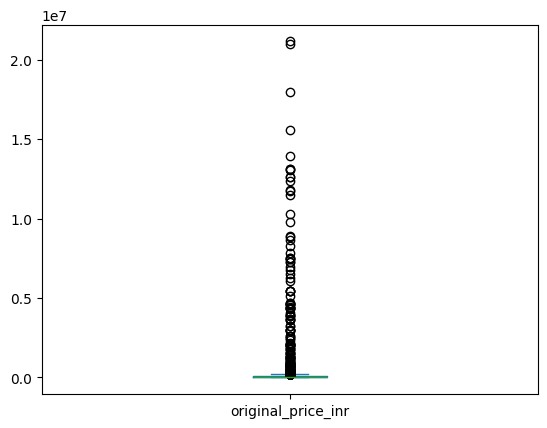

In [47]:
df['original_price_inr'].plot(kind='box')

In [48]:
df['original_price_inr'].describe()

,original_price_inr
count,3.300000e+04
mean,7.987689e+04
std,3.832541e+05
min,2.374840e+03
25%,2.509387e+04
50%,4.645894e+04
75%,8.887268e+04
max,2.117212e+07


In [49]:
Q1=df['original_price_inr'].quantile(0.25)
Q3=df['original_price_inr'].quantile(0.75)
Q3,Q1

(np.float64(88872.68), np.float64(25093.87))

In [50]:
IQR=Q3-Q1
IQR

np.float64(63778.81)

In [51]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [52]:
lower_limit,upper_limit

(np.float64(-70574.345), np.float64(184540.895))

In [53]:
df[((df['original_price_inr'] < lower_limit) | (df['original_price_inr'] > upper_limit))]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
13,TXN_2015_00000014,2015-01-11,CUST_2015_00004676,PROD_000006,Apple iPhone 6 16GB Blue,Electronics,Smartphones,Apple,209875.55,0.00,209875.55,1,209875.55,0.0,209875.55,Mumbai,Maharashtra,Metro,Premium,26-35,Credit Card,4,Standard,False,False,NaN,4.000000,Delivered,1,2015,1,0.17,True,3.3
117,TXN_2015_00000118,NaT,CUST_2015_00005492,PROD_000001,Apple iPhone 6 16GB Black,Electronics,Smartphones,Apple,190469.10,25.24,142386.45,3,427159.35,0.0,427159.35,Chennai,Tamil Nadu,Metro,Premium,18-25,Credit Card,3,Standard,False,True,Republic Day Sale,4.321564,Delivered,1,2015,1,0.21,True,3.9
124,TXN_2015_00000125,2015-01-01,CUST_2015_00004611,PROD_000004,Apple iPhone 6 16GB White,Electronics,Smartphones,Apple,211721.16,16.06,177708.58,1,177708.58,0.0,177708.58,Mumbai,Maharashtra,Metro,Premium,18-25,COD,4,Standard,False,False,NaN,3.500000,Delivered,1,2015,1,0.21,True,4.1
241,TXN_2015_00000242,2015-01-31,CUST_2015_00011357,PROD_001652,Alienware Inspiron 4GB RAM Black,Electronics,Laptops,Alienware,185009.58,0.00,185009.58,1,185009.58,0.0,185009.58,Mumbai,Maharashtra,Metro,Premium,26-35,Debit Card,6,Standard,False,False,NaN,4.321564,Delivered,1,2015,1,1.62,True,4.6
294,TXN_2015_00000295,2015-01-02,CUST_2015_00010632,PROD_001652,Alienware Inspiron 4GB RAM Black,Electronics,Laptops,Alienware,185009.58,0.00,185009.58,1,185009.58,0.0,185009.58,Delhi,Delhi,Metro,Premium,18-25,COD,5,Standard,False,False,NaN,4.500000,Delivered,1,2015,1,1.62,True,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32827,TXN_2015_00032828,2015-12-08,CUST_2015_00001739,PROD_001524,HP Inspiron 8GB RAM Black,Electronics,Laptops,HP,184704.89,18.04,151385.09,2,302770.17,0.0,302770.17,Bengaluru,Karnataka,Metro,Premium,NaN,COD,5,Standard,False,False,NaN,5.000000,Delivered,12,2015,4,2.60,True,3.9
32851,TXN_2015_00032852,2015-12-31,CUST_2015_00009838,PROD_000015,Apple iPhone 6 Plus 16GB Blue,Electronics,Smartphones,Apple,187232.01,27.78,135212.45,1,135212.45,0.0,135212.45,Chennai,Tamil Nadu,Metro,Premium,26-35,COD,4,Standard,False,False,NaN,4.500000,Delivered,12,2015,4,0.20,False,4.1
32860,TXN_2015_00032861,2015-12-01,CUST_2015_00002221,PROD_001949,Noise Watch Premium,Electronics,Smart Watch,Noise,466809.00,21.19,36787.90,1,36787.90,0.0,36787.90,Nagpur,Maharashtra,Tier1,Budget,26-35,COD,3,Standard,False,False,NaN,4.000000,Delivered,12,2015,4,0.07,True,4.3
32906,TXN_2015_00032907,NaT,CUST_2015_00001371,PROD_000006,Apple iPhone 6 16GB Blue,Electronics,Smartphones,Apple,209875.55,0.00,209875.55,1,209875.55,0.0,209875.55,Bengaluru,Karnataka,Metro,Premium,NaN,COD,6,Standard,False,False,NaN,4.321564,Delivered,12,2015,4,0.17,True,3.3


In [54]:
df=df[(df['original_price_inr']>=lower_limit)&(df['original_price_inr']<=upper_limit)]

In [55]:
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2015_00000001,2015-01-25,CUST_2015_00003884,PROD_000021,Samsung Galaxy S6 16GB Black,Electronics,Smartphones,Samsung,123614.29,27.91,89112.17,1,89112.17,0.0,89112.17,Mumbai,Maharashtra,Metro,Premium,46-55,COD,6,Standard,False,True,Republic Day Sale,5.000000,Delivered,1,2015,1,0.19,True,4.7
1,TXN_2015_00000002,2015-01-05,CUST_2015_00011709,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,54731.86,0.00,54731.86,1,54731.86,0.0,54731.86,Allahabad,Uttar Pradesh,Rural,Standard,26-35,COD,4,Standard,False,False,NaN,4.500000,Delivered,1,2015,1,0.20,True,4.1
2,TXN_2015_00000003,2015-01-24,CUST_2015_00004782,PROD_000039,Samsung Galaxy Note 5 64GB Black,Electronics,Smartphones,Samsung,97644.25,46.93,51818.26,2,103636.52,NaN,103636.52,Mumbai,Maharashtra,Metro,Premium,26-35,COD,4,Standard,False,True,Republic Day Sale,4.321564,Delivered,1,2015,1,0.17,True,3.3
3,TXN_2015_00000004,2015-01-28,CUST_2015_00008105,PROD_000085,Motorola Moto G (3rd Gen) 16GB Black,Electronics,Smartphones,Motorola,21947.26,0.00,21947.26,1,21947.26,0.0,21947.26,Kolkata,West Bengal,Metro,Budget,36-45,COD,4,Standard,False,False,NaN,3.000000,Delivered,1,2015,1,0.22,True,3.5
4,TXN_2015_00000005,2015-01-31,CUST_2015_00002955,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,54731.86,0.00,54731.86,2,109463.72,0.0,109463.72,Ludhiana,Punjab,Tier2,Standard,18-25,COD,3,Standard,False,False,NaN,4.000000,Delivered,1,2015,1,0.20,True,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32995,TXN_2015_00032996,2015-12-16,CUST_2015_00005804,PROD_001733,OnePlus Galaxy Tab 4GB RAM Silver,Electronics,Tablets,OnePlus,46234.09,0.00,46234.09,2,92468.18,0.0,92468.18,Ahmedabad,Gujarat,Tier1,Standard,36-45,COD,6,Standard,False,False,NaN,5.000000,Delivered,12,2015,4,0.53,False,4.3
32996,TXN_2015_00032997,2015-12-30,CUST_2015_00011500,PROD_000051,Samsung Galaxy J7 32GB Blue,Electronics,Smartphones,Samsung,19871.97,0.00,19871.97,1,19871.97,0.0,19871.97,Lucknow,Uttar Pradesh,Tier1,Standard,26-35,COD,5,Standard,False,False,NaN,4.321564,Delivered,12,2015,4,0.19,True,4.3
32997,TXN_2015_00032998,2015-12-28,CUST_2015_00000632,PROD_000073,Xiaomi Redmi 2 16GB White,Electronics,Smartphones,Xiaomi,43767.40,28.40,31336.66,1,31336.66,0.0,31336.66,Mumbai,Maharashtra,Metro,Budget,26-35,COD,6,Standard,False,False,NaN,5.000000,Delivered,12,2015,4,0.23,True,4.2
32998,TXN_2015_00032999,2015-12-26,CUST_2015_00008830,PROD_001693,Samsung Galaxy Tab 8GB RAM Black,Electronics,Tablets,Samsung,73967.02,10.83,65957.94,1,65957.94,0.0,65957.94,Bengaluru,Karnataka,Metro,Standard,26-35,COD,4,Standard,False,False,NaN,5.000000,Delivered,12,2015,4,0.45,True,3.7


#Question 10
Payment methods contain inconsistent naming: 'UPI/PhonePe/GooglePay', 'Credit Card/CREDIT_CARD/CC', 'Cash on Delivery/COD/C.O.D'. Standardize payment method categories and create a clean categorical hierarchy.


In [56]:
df['payment_method'].unique()

array(['COD', 'Debit Card', 'Credit Card', 'Net Banking'], dtype=object)

In [57]:
mapping_payment_method = {
    'COD': 'Cash',
    'UPI': 'UPI',
    'Debit Card': 'Card',
    'Credit Card': 'Card',
    'Net Banking': 'Online Banking',
    'Wallet': 'Wallet',
    'BNPL': 'BNPL'
}

df['payment_method'] = df['payment_method'].replace(mapping_payment_method)

In [58]:
df['payment_method'].unique()

array(['Cash', 'Card', 'Online Banking'], dtype=object)

In [59]:
df.isnull().sum()

,0
transaction_id,0
order_date,3175
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [60]:
df['delivery_charges'].sample(10)

,delivery_charges
31537,0.0
12544,0.0
11881,0.0
5569,0.0
28549,0.0
140,0.0
22162,NaN
29846,0.0
22541,0.0
13235,0.0


In [61]:
df['delivery_charges'].isnull().sum()

np.int64(2579)

In [62]:
df['delivery_charges']=df['delivery_charges'].fillna(df['delivery_charges'].mean())

In [63]:
df['customer_age_group'].unique()

array(['46-55', '26-35', '36-45', '18-25', nan, '55+'], dtype=object)

In [64]:
mapping_age_group = {
    '18-25': 'Group-1',
    '26-35': 'Group-2',
    '36-45': 'Group-3',
    '46-55': 'Group-4',
    '55+':   'Group-5'
}

df['customer_age_group'] = df['customer_age_group'].replace(mapping_age_group)

In [65]:
df['customer_age_group'].unique()

array(['Group-4', 'Group-2', 'Group-3', 'Group-1', nan, 'Group-5'],
      dtype=object)

In [66]:
# df['customer_age_group'].mode()[0]
df['customer_age_group']=df['customer_age_group'].fillna(df['customer_age_group'].mode()[0])

In [67]:
df['customer_age_group'].isnull().sum()

np.int64(0)

In [68]:
df.isnull().sum()

,0
transaction_id,0
order_date,3175
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [69]:
df=df.drop(columns=['festival_name'])

In [70]:
df.isnull().sum()

,0
transaction_id,0
order_date,3175
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32299 entries, 0 to 32999
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   transaction_id          32299 non-null  object        
 1   order_date              29124 non-null  datetime64[ns]
 2   customer_id             32299 non-null  object        
 3   product_id              32299 non-null  object        
 4   product_name            32299 non-null  object        
 5   category                32299 non-null  object        
 6   subcategory             32299 non-null  object        
 7   brand                   32299 non-null  object        
 8   original_price_inr      32299 non-null  float64       
 9   discount_percent        32299 non-null  float64       
 10  discounted_price_inr    32299 non-null  float64       
 11  quantity                32299 non-null  int64         
 12  subtotal_inr            32299 non-null  float64    

In [73]:
df.to_csv('cleaned_2015.csv')